<a href="https://colab.research.google.com/github/SmartNandini/Music_Genre/blob/main/Music_Genre_Classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Music Genre Classification

[GTZAN Dataset on Kaggle](https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification) 

Used libraries:
- librosa, librosa.display
- matplotlib
- numpy
- os
- math
- json

In [1]:
f = open("kaggle.json", "x")
f.write('{"username":"datasettoken","key":"619752ec857e20e3f2085d6f741f70d8"}')
f.close()

In [2]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 98% 1.19G/1.21G [00:05<00:00, 266MB/s]
100% 1.21G/1.21G [00:05<00:00, 240MB/s]


In [3]:
! unzip /content/gtzan-dataset-music-genre-classification.zip
! rm /content/Data/genres_original/jazz/jazz.00054.wav

Archive:  /content/gtzan-dataset-music-genre-classification.zip
  inflating: Data/features_30_sec.csv  
  inflating: Data/features_3_sec.csv  
  inflating: Data/genres_original/blues/blues.00000.wav  
  inflating: Data/genres_original/blues/blues.00001.wav  
  inflating: Data/genres_original/blues/blues.00002.wav  
  inflating: Data/genres_original/blues/blues.00003.wav  
  inflating: Data/genres_original/blues/blues.00004.wav  
  inflating: Data/genres_original/blues/blues.00005.wav  
  inflating: Data/genres_original/blues/blues.00006.wav  
  inflating: Data/genres_original/blues/blues.00007.wav  
  inflating: Data/genres_original/blues/blues.00008.wav  
  inflating: Data/genres_original/blues/blues.00009.wav  
  inflating: Data/genres_original/blues/blues.00010.wav  
  inflating: Data/genres_original/blues/blues.00011.wav  
  inflating: Data/genres_original/blues/blues.00012.wav  
  inflating: Data/genres_original/blues/blues.00013.wav  
  inflating: Data/genres_original/blues/blues

In [4]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

In [7]:
example_file = "/content/Data/genres_original/disco/disco.00001.wav"

In [8]:
# load audio file with Librosa
signal, sample_rate = librosa.load(example_file)

In [9]:
print(signal)

[-0.18777466 -0.23693848 -0.15542603 ...  0.03741455  0.10574341
  0.09619141]


In [10]:
print(sample_rate)

22050


In [11]:
FIG_SIZE = (16,8)

Text(0.5, 1.0, 'Waveform')

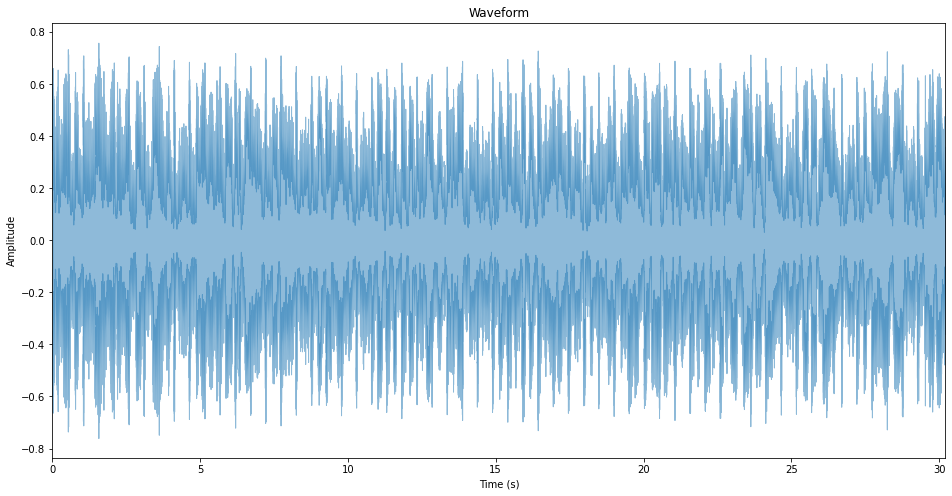

In [12]:
# WAVEFORM
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(signal, sample_rate, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

In [13]:
# Fourier Transform (FFT) - Frequency Domain
fft = np.fft.fft(signal)

In [14]:
# Calculate the Magnitude (abs values on complex numbers)
spectrum = np.abs(fft)

In [15]:
# Create the Frequency variable
f = np.linspace(0, sample_rate, len(spectrum))

Text(0.5, 1.0, 'Power Spectrum')

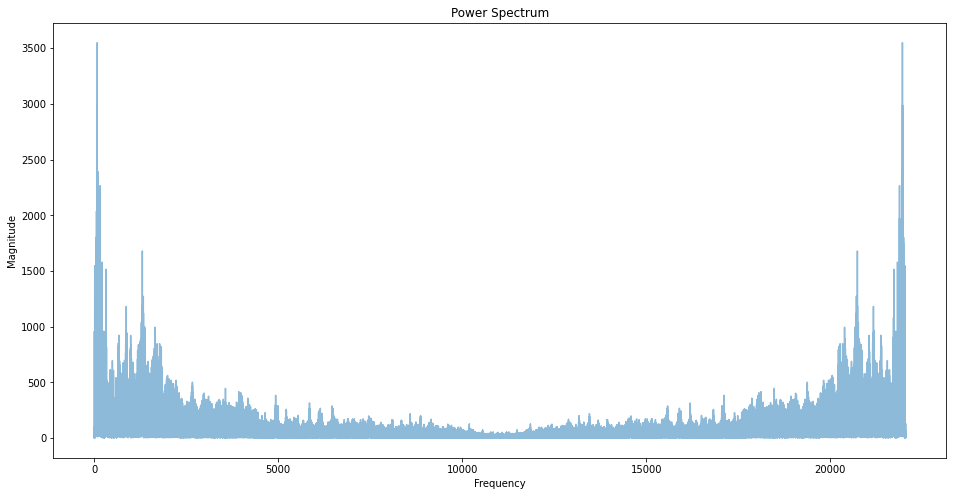

In [16]:
# Plot Spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(f, spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

In [17]:
# Take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

Text(0.5, 1.0, 'Power Spectrum')

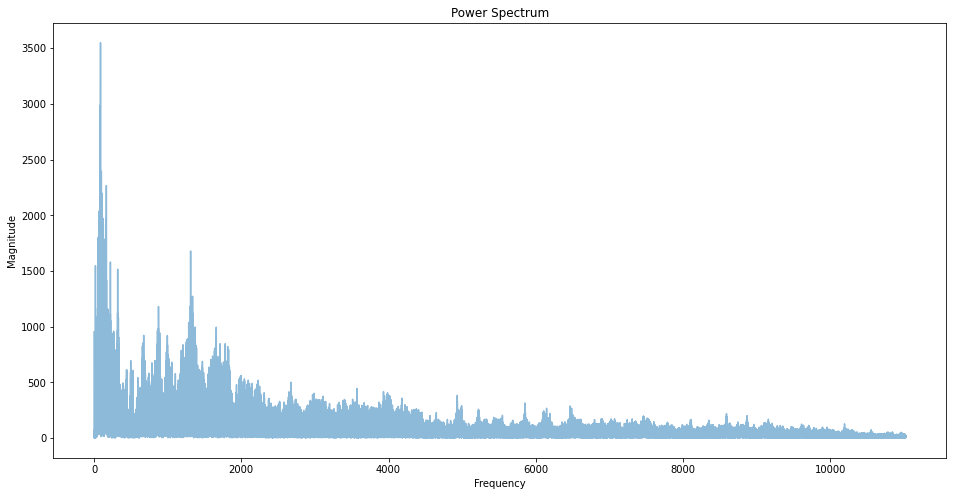

In [18]:
# Plot Spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

In [19]:
# Spectrogram (STFT)
hop_length = 512 # num. of samples
n_fft = 2048 # num. of samples for window

In [20]:
# Perform STFT
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

In [21]:
# Calculate the Magnitude (abs values on complex numbers)
spectrogram = np.abs(stft)

Text(0.5, 1.0, 'Spectrogram')

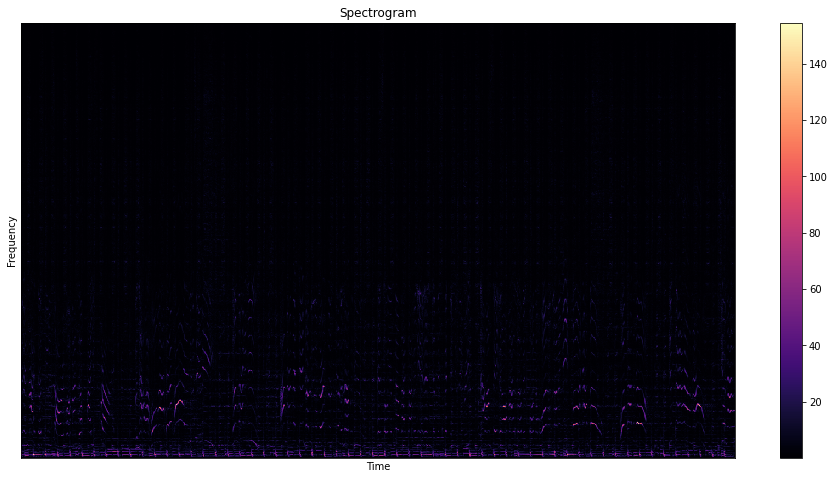

In [22]:
# Plot the Spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

In [23]:
# Apply Logarithm to get values in Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

Text(0.5, 1.0, 'Spectrogram (dB)')

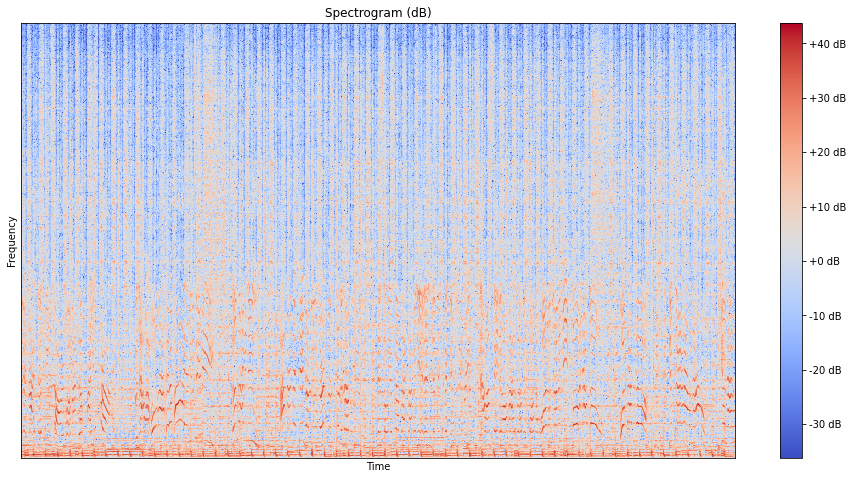

In [24]:
# Plot the Spectrogram in Decibels
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

In [25]:
# MFCCs (we use 13 MFCCs)
MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

Text(0.5, 1.0, 'MFCCs')

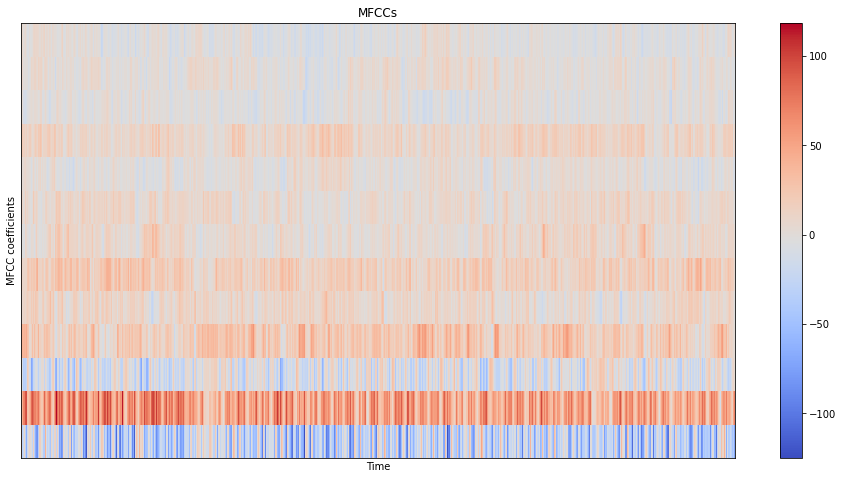

In [26]:
# Plot MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

In [27]:
import json
import os
import math

In [32]:
DATASET_PATH = "/content/Data/genres_original"
JSON_PATH = "/content/data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [29]:
def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along with genre labels.
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

		# load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [33]:
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)

Streaming output truncated to the last 5000 lines.
/content/Data/genres_original/hiphop/hiphop.00099.wav, segment:7
/content/Data/genres_original/hiphop/hiphop.00099.wav, segment:8
/content/Data/genres_original/hiphop/hiphop.00099.wav, segment:9
/content/Data/genres_original/hiphop/hiphop.00099.wav, segment:10
/content/Data/genres_original/hiphop/hiphop.00078.wav, segment:1
/content/Data/genres_original/hiphop/hiphop.00078.wav, segment:2
/content/Data/genres_original/hiphop/hiphop.00078.wav, segment:3
/content/Data/genres_original/hiphop/hiphop.00078.wav, segment:4
/content/Data/genres_original/hiphop/hiphop.00078.wav, segment:5
/content/Data/genres_original/hiphop/hiphop.00078.wav, segment:6
/content/Data/genres_original/hiphop/hiphop.00078.wav, segment:7
/content/Data/genres_original/hiphop/hiphop.00078.wav, segment:8
/content/Data/genres_original/hiphop/hiphop.00078.wav, segment:9
/content/Data/genres_original/hiphop/hiphop.00078.wav, segment:10
/content/Data/genres_original/hiphop/

In [35]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

import matplotlib.pyplot as plt
import random

import librosa
import math

In [36]:
# path to json
DATA_PATH = "/content/data_10.json"

In [37]:
def load_data(data_path):

    with open(data_path, "r") as f:
        data = json.load(f)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y

In [38]:
# load data
X, y = load_data(DATA_PATH)

Data succesfully loaded!


In [39]:
X.shape

(9986, 130, 13)

In [40]:
# create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Simple ANN

In [58]:
# build network topology
model = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu'),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu'),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu'),

    # output layer
    keras.layers.Dense(11, activation='softmax')
])

In [59]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
     

In [60]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 1690)              0         
                                                                 
 dense_16 (Dense)            (None, 512)               865792    
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 dense_18 (Dense)            (None, 64)                16448     
                                                                 
 dense_19 (Dense)            (None, 11)                715       
                                                                 
Total params: 1,014,283
Trainable params: 1,014,283
Non-trainable params: 0
_________________________________________________________________


In [61]:
# train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50)
     

Epoch 1/50
219/219 [==============================] - 4s 19ms/step - loss: 6.7842 - accuracy: 0.2893 - val_loss: 3.7470 - val_accuracy: 0.3368
Epoch 2/50
219/219 [==============================] - 3s 16ms/step - loss: 2.5401 - accuracy: 0.3991 - val_loss: 2.5529 - val_accuracy: 0.3822
Epoch 3/50
219/219 [==============================] - 3s 15ms/step - loss: 1.9719 - accuracy: 0.4624 - val_loss: 2.3421 - val_accuracy: 0.4219
Epoch 4/50
219/219 [==============================] - 5s 24ms/step - loss: 1.6177 - accuracy: 0.5258 - val_loss: 2.1138 - val_accuracy: 0.4536
Epoch 5/50
219/219 [==============================] - 4s 17ms/step - loss: 1.3712 - accuracy: 0.5775 - val_loss: 2.1646 - val_accuracy: 0.4413
Epoch 6/50
219/219 [==============================] - 4s 17ms/step - loss: 1.1611 - accuracy: 0.6229 - val_loss: 2.0354 - val_accuracy: 0.4693
Epoch 7/50
219/219 [==============================] - 4s 18ms/step - loss: 1.0258 - accuracy: 0.6587 - val_loss: 2.0117 - val_accuracy: 0.4763

In [62]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()
     

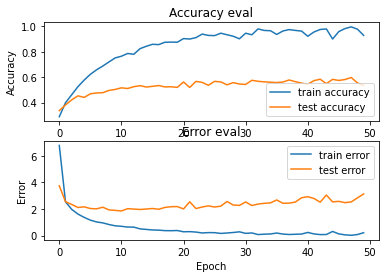

In [63]:
# plot accuracy and error as a function of the epochs
plot_history(history)
     

In [64]:
# build network topology
model_regularized = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # output layer
    keras.layers.Dense(11, activation='softmax')
])

In [65]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_regularized.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [66]:
# train model
history = model_regularized.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
219/219 [==============================] - 4s 14ms/step - loss: 20.5068 - accuracy: 0.1652 - val_loss: 3.6596 - val_accuracy: 0.1896
Epoch 2/100
219/219 [==============================] - 3s 15ms/step - loss: 6.3660 - accuracy: 0.1604 - val_loss: 3.5670 - val_accuracy: 0.1505
Epoch 3/100
219/219 [==============================] - 3s 15ms/step - loss: 4.5108 - accuracy: 0.1469 - val_loss: 3.5549 - val_accuracy: 0.1409
Epoch 4/100
219/219 [==============================] - 3s 13ms/step - loss: 4.0333 - accuracy: 0.1491 - val_loss: 3.5406 - val_accuracy: 0.1412
Epoch 5/100
219/219 [==============================] - 3s 12ms/step - loss: 3.8186 - accuracy: 0.1486 - val_loss: 3.5083 - val_accuracy: 0.1532
Epoch 6/100
219/219 [==============================] - 3s 12ms/step - loss: 3.7027 - accuracy: 0.1618 - val_loss: 3.4856 - val_accuracy: 0.1646
Epoch 7/100
219/219 [==============================] - 3s 12ms/step - loss: 3.6462 - accuracy: 0.1652 - val_loss: 3.4768 - val_accuracy

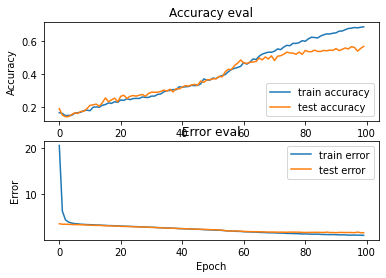

In [67]:
# plot accuracy and error as a function of the epochs
plot_history(history)

In [68]:
# create train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

# add an axis to input sets
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]
     

X_train.shape

(5991, 130, 13, 1)

In [69]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [74]:
# build the CNN
model_cnn = keras.Sequential()

# 1st conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 3rd conv layer
model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# flatten output and feed it into dense layer
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.3))

# output layer
model_cnn.add(keras.layers.Dense(11, activation='softmax'))

In [75]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [76]:

model_cnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 11, 32)       320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 6, 32)        0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 64, 6, 32)        128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 62, 4, 32)         9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 2, 32)        0         
 2D)                                                             
                                                      

In [77]:
# train model
history = model_cnn.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=50)

Epoch 1/50
188/188 [==============================] - 14s 69ms/step - loss: 2.4380 - accuracy: 0.2442 - val_loss: 1.7962 - val_accuracy: 0.3899
Epoch 2/50
188/188 [==============================] - 13s 68ms/step - loss: 1.8408 - accuracy: 0.3712 - val_loss: 1.4884 - val_accuracy: 0.4940
Epoch 3/50
188/188 [==============================] - 16s 87ms/step - loss: 1.6532 - accuracy: 0.4211 - val_loss: 1.3532 - val_accuracy: 0.5340
Epoch 4/50
188/188 [==============================] - 13s 67ms/step - loss: 1.5418 - accuracy: 0.4553 - val_loss: 1.2727 - val_accuracy: 0.5594
Epoch 5/50
188/188 [==============================] - 13s 67ms/step - loss: 1.4138 - accuracy: 0.5076 - val_loss: 1.2012 - val_accuracy: 0.5781
Epoch 6/50
188/188 [==============================] - 13s 67ms/step - loss: 1.3643 - accuracy: 0.5156 - val_loss: 1.1603 - val_accuracy: 0.6008
Epoch 7/50
188/188 [==============================] - 13s 67ms/step - loss: 1.2840 - accuracy: 0.5447 - val_loss: 1.1025 - val_accuracy:

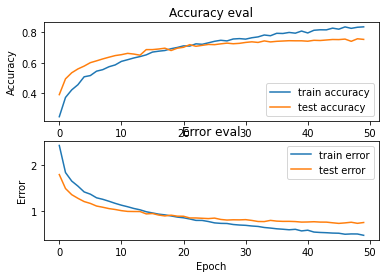

In [78]:
# plot accuracy and error as a function of the epochs
plot_history(history)

In [79]:
# evaluate model on Test Set
test_loss, test_acc = model_cnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

79/79 - 1s - loss: 0.7590 - accuracy: 0.7489 - 931ms/epoch - 12ms/step

Test accuracy: 0.7488986849784851


In [80]:
model_cnn.save("Music_Genre_10_CNN")

In [81]:
model_cnn.save("Music_Genre_10_CNN.h5")

In [82]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("Music_Genre_10_CNN.h5")

In [83]:
# pick a sample to predict from the test set
X_to_predict = X_test[100]
y_to_predict = y_test[100]

In [84]:
X_to_predict.shape

(130, 13, 1)

In [86]:
print("Real Genre:", y_to_predict)

Real Genre: 9


In [87]:
# add a dimension to input data for sample - model.predict() expects a 4d array in this case
X_to_predict = X_to_predict[np.newaxis, ...] # array shape (1, 130, 13, 1)

In [88]:
X_to_predict.shape

(1, 130, 13, 1)

In [89]:
# perform prediction
prediction = model_cnn.predict(X_to_predict)

1/1 [==============================] - 0s 199ms/step


In [90]:
# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

Predicted Genre: 9


In [91]:
# pick a sample to predict from the test set
X_to_predict = X_test[50]
y_to_predict = y_test[50]

print("Real Genre:", y_to_predict)

X_to_predict = X_to_predict[np.newaxis, ...]

prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))


Real Genre: 10
1/1 [==============================] - 0s 24ms/step
Predicted Genre: 10


In [92]:
len(X_test)

2497

In [93]:
for n in range(10):

  i = random.randint(0,len(X_test))
  # pick a sample to predict from the test set
  X_to_predict = X_test[i]
  y_to_predict = y_test[i]

  print("\nReal Genre:", y_to_predict)

  X_to_predict = X_to_predict[np.newaxis, ...]

  prediction = model_cnn.predict(X_to_predict)

  # get index with max value
  predicted_index = np.argmax(prediction, axis=1)

  print("Predicted Genre:", int(predicted_index))


Real Genre: 9
1/1 [==============================] - 0s 21ms/step
Predicted Genre: 2

Real Genre: 8
1/1 [==============================] - 0s 24ms/step
Predicted Genre: 8

Real Genre: 0
1/1 [==============================] - 0s 15ms/step
Predicted Genre: 0

Real Genre: 5
1/1 [==============================] - 0s 20ms/step
Predicted Genre: 5

Real Genre: 10
1/1 [==============================] - 0s 15ms/step
Predicted Genre: 10

Real Genre: 5
1/1 [==============================] - 0s 19ms/step
Predicted Genre: 5

Real Genre: 4
1/1 [==============================] - 0s 19ms/step
Predicted Genre: 2

Real Genre: 4
1/1 [==============================] - 0s 16ms/step
Predicted Genre: 2

Real Genre: 4
1/1 [==============================] - 0s 15ms/step
Predicted Genre: 4

Real Genre: 7
1/1 [==============================] - 0s 17ms/step
Predicted Genre: 7
